In [1]:
# Recommender System on Movie data set same dataset as Matlab Coursera Andrew Ng Course

# importing packages
import numpy as np
import pandas as pd

In [2]:
# Data Wrangling
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/ml-100k/u.data', sep ='\t', names = header)

In [3]:
# looking at data
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# No. of users and items
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of Users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of Users = 943 | Number of movies = 1682


In [5]:
# Splitting the Data
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df, test_size = 0.25)

In [6]:
train_data.head()

,user_id,item_id,rating,timestamp
85138,254,143,4,886472643
77845,766,630,3,891310772
96964,908,264,3,879722206
34072,551,1267,4,892783906
85605,782,181,3,891499213


In [7]:
test_data.tail(6)

,user_id,item_id,rating,timestamp
58435,658,488,4,875148196
58102,197,4,3,891409981
35872,496,774,5,876066424
94476,299,114,4,878191943
72977,860,286,4,874967063
69696,804,89,4,879441524


In [8]:
# Creating User-Item Matrices, one for Training and other for testing

# intantiating training data matrix with 0 value
train_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    train_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]
    
# intantiating testing data matrix with 0 value
test_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    test_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]

In [9]:
# For User-Item Collaborative Filtering the similarity values between users are measured by observing all the items that are rated by both users.
# The similarity values between items in Item-Item Collaborative Filtering are measured by observing all the users who have rated both items.

In [10]:
# calculating distance metic as cosine similarity function
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = pairwise_distances(train_data_matrix, metric = 'cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric= 'cosine')

In [11]:
user_similarity

array([[ 0.        ,  0.85889923,  0.98567158, ...,  0.90158671,
         0.84393059,  0.67875169],
       [ 0.85889923,  0.        ,  0.93024899, ...,  0.85142444,
         0.87289271,  0.97364055],
       [ 0.98567158,  0.93024899,  0.        , ...,  0.92190644,
         0.94831564,  0.98061675],
       ..., 
       [ 0.90158671,  0.85142444,  0.92190644, ...,  0.        ,
         1.        ,  0.95696747],
       [ 0.84393059,  0.87289271,  0.94831564, ...,  1.        ,
         0.        ,  0.8518642 ],
       [ 0.67875169,  0.97364055,  0.98061675, ...,  0.95696747,
         0.8518642 ,  0.        ]])

In [12]:
# function to calculate predictions
def predict(ratings, similarity, type = 'user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis = 1)
        ratings_diff = ratings - mean_user_rating[:, np.newaxis]
# newaxis is used to increase the dimension of the existing array by one more dimension
# i.e. to make mean_user_rating to same dimension as rating
# newaxis is None returns TRUE they are same object i.e none can be used in it's place
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis = 1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity)/np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [13]:
# Users who liked this item also liked ...
# Item based Collaborative Filtering
item_prediction = predict(train_data_matrix, item_similarity, type='item')
# Users who are similar to you also liked ...
# User based collaborative Filtering
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [14]:
user_prediction

array([[ 1.60134981,  0.59711005,  0.50703573, ...,  0.30865491,
         0.30852709,  0.30620137],
       [ 1.31493621,  0.30309302,  0.15996587, ..., -0.06205848,
        -0.06066217, -0.06390375],
       [ 1.34292641,  0.26445711,  0.12893681, ..., -0.09879873,
        -0.09677261, -0.10005074],
       ..., 
       [ 1.20112446,  0.23046856,  0.0930102 , ..., -0.12070269,
        -0.11975381, -0.12286677],
       [ 1.37787922,  0.33770242,  0.22801157, ...,  0.00827516,
         0.00885208,  0.00605828],
       [ 1.41420954,  0.3993198 ,  0.31084043, ...,  0.11465009,
         0.11454865,  0.11215797]])

In [15]:
# Evaluation or Testing(using Root Mean Square Error)
# Using (MSE) Mean Square Error function... RMSE = MSE^(1/2)
# Ground truth refers to the label for each training sample you have 
# i.e. you know which category/outcome each training sample belongs to

# only consider predicted rating of nonzero test dataset use:
# prediction[ground_truth.nonzero()]

from sklearn.metrics import mean_squared_error as mse
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mse(prediction, ground_truth))

In [16]:
# Memory Based CF having Cold Start Problem
print('User-based Collaborative Filtering RMSE:' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based Collaborative Filtering RMSE:' + str(rmse(item_prediction, test_data_matrix)))

User-based Collaborative Filtering RMSE:3.1301902878936048
Item-based Collaborative Filtering RMSE:3.4577789669855963


In [17]:
######### MODEL BASED COLLABORATIVE FILTERING ALGORITHM #######
# BASED ON MATRIX FACTORIZATION uses SVD

sparsity = round(1.0-len(df)/float(n_users*n_items),3)
print('sparsity level of MovieLens100K is '+ str(sparsity*100) + '%')

sparsity level of MovieLens100K is 93.7%


In [18]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.388943556859095


In [19]:
########## HYbrid Recommender SYstems ##########################

In [20]:
## correcting bad zip file error from lightfm datasets

import itertools
import os
import zipfile

import numpy as np

import scipy.sparse as sp

from lightfm.datasets import _common


def _read_raw_data(path):
    """
    Return the raw lines of the train and test files.
    """

    with zipfile.ZipFile(path) as datafile:
        return (datafile.read('ml-100k/ua.base').decode().split('\n'),
                datafile.read('ml-100k/ua.test').decode().split('\n'),
                datafile.read('ml-100k/u.item').decode(errors='ignore').split('\n'),
                datafile.read('ml-100k/u.genre').decode(errors='ignore').split('\n'))


def _parse(data):

    for line in data:

        if not line:
            continue

        uid, iid, rating, timestamp = [int(x) for x in line.split('\t')]

        # Subtract one from ids to shift
        # to zero-based indexing
        yield uid - 1, iid - 1, rating, timestamp


def _get_dimensions(train_data, test_data):

    uids = set()
    iids = set()

    for uid, iid, _, _ in itertools.chain(train_data,
                                          test_data):
        uids.add(uid)
        iids.add(iid)

    rows = max(uids) + 1
    cols = max(iids) + 1

    return rows, cols


def _build_interaction_matrix(rows, cols, data, min_rating):

    mat = sp.lil_matrix((rows, cols), dtype=np.int32)

    for uid, iid, rating, _ in data:
        if rating >= min_rating:
            mat[uid, iid] = rating

    return mat.tocoo()


def _parse_item_metadata(num_items,
                         item_metadata_raw, genres_raw):

    genres = []

    for line in genres_raw:
        if line:
            genre, gid = line.split('|')
            genres.append('genre:{}'.format(genre))

    id_feature_labels = np.empty(num_items, dtype=np.object)
    genre_feature_labels = np.array(genres)

    id_features = sp.identity(num_items,
                              format='csr',
                              dtype=np.float32)
    genre_features = sp.lil_matrix((num_items, len(genres)),
                                   dtype=np.float32)

    for line in item_metadata_raw:

        if not line:
            continue

        splt = line.split('|')

        # Zero-based indexing
        iid = int(splt[0]) - 1
        title = splt[1]

        id_feature_labels[iid] = title

        item_genres = [idx for idx, val in
                       enumerate(splt[5:])
                       if int(val) > 0]

        for gid in item_genres:
            genre_features[iid, gid] = 1.0

    return (id_features, id_feature_labels,
            genre_features.tocsr(), genre_feature_labels)


#[docs]
def fetch_movielens(data_home=None, indicator_features=True, genre_features=False,
                    min_rating=0.0, download_if_missing=True):
    """
    Fetch the `Movielens 100k dataset <http://grouplens.org/datasets/movielens/100k/>`_.

    The dataset contains 100,000 interactions from 1000 users on 1700 movies,
    and is exhaustively described in its
    `README <http://files.grouplens.org/datasets/movielens/ml-100k-README.txt>`_.

    Parameters
    ----------

    data_home: path, optional
        Path to the directory in which the downloaded data should be placed.
        Defaults to ``~/lightfm_data/``.
    indicator_features: bool, optional
        Use an [n_users, n_users] identity matrix for item features. When True with genre_features,
        indicator and genre features are concatenated into a single feature matrix of shape
        [n_users, n_users + n_genres].
    genre_features: bool, optional
        Use a [n_users, n_genres] matrix for item features. When True with item_indicator_features,
        indicator and genre features are concatenated into a single feature matrix of shape
        [n_users, n_users + n_genres].
    min_rating: float, optional
        Minimum rating to include in the interaction matrix.
    download_if_missing: bool, optional
        Download the data if not present. Raises an IOError if False and data is missing.

    Notes
    -----

    The return value is a dictionary containing the following keys:

    Returns
    -------

    train: sp.coo_matrix of shape [n_users, n_items]
         Contains training set interactions.
    test: sp.coo_matrix of shape [n_users, n_items]
         Contains testing set interactions.
    item_features: sp.csr_matrix of shape [n_items, n_item_features]
         Contains item features.
    item_feature_labels: np.array of strings of shape [n_item_features,]
         Labels of item features.
    item_labels: np.array of strings of shape [n_items,]
         Items' titles.
    """

    if not (indicator_features or genre_features):
        raise ValueError('At least one of item_indicator_features '
                         'or genre_features must be True')

    zip_path = _common.get_data(data_home,
                                ('https://github.com/maciejkula/'
                                 'lightfm_datasets/releases/'
                                 'download/v0.1.0/movielens.zip'),
                                'movielens100k',
                                'movielens.zip',
                                download_if_missing)

    # Load raw data
    try:
        (train_raw, test_raw,
         item_metadata_raw, genres_raw) = _read_raw_data(zip_path)
    except zipfile.BadZipFile:
        # Download was corrupted, get rid of the partially
        # downloaded file so that we re-download on the
        # next try.
        os.unlink(zip_path)
        raise ValueError('Corrupted Movielens download. Check your '
                         'internet connection and try again.')

    # Figure out the dimensions
    num_users, num_items = _get_dimensions(_parse(train_raw),
                                           _parse(test_raw))

    # Load train interactions
    train = _build_interaction_matrix(num_users,
                                      num_items,
                                      _parse(train_raw),
                                      min_rating)
    # Load test interactions
    test = _build_interaction_matrix(num_users,
                                     num_items,
                                     _parse(test_raw),
                                     min_rating)

    assert train.shape == test.shape

    # Load metadata features
    (id_features, id_feature_labels,
     genre_features_matrix, genre_feature_labels) = _parse_item_metadata(num_items,
                                                                         item_metadata_raw,
                                                                         genres_raw)

    assert id_features.shape == (num_items, len(id_feature_labels))
    assert genre_features_matrix.shape == (num_items, len(genre_feature_labels))

    if indicator_features and not genre_features:
        features = id_features
        feature_labels = id_feature_labels
    elif genre_features and not indicator_features:
        features = genre_features_matrix
        feature_labels = genre_feature_labels
    else:
        features = sp.hstack([id_features, genre_features_matrix]).tocsr()
        feature_labels = np.concatenate((id_feature_labels,
                                         genre_feature_labels))

    data = {'train': train,
            'test': test,
            'item_features': features,
            'item_feature_labels': feature_labels,
            'item_labels': id_feature_labels}
    return data

C:\Users\hp\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [21]:
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM

# Load the MovieLens 100k dataset. Only five
# star ratings are treated as positive.
data = fetch_movielens(min_rating=1.0)

# training and testing data
print(repr(data['train']))
print(repr(data['test']))

# Instantiate and train the model
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

from lightfm.evaluation import precision_at_k
# Evaluate the trained model
print("Train precision: %.2f" % precision_at_k(model, data['train'], k=5).mean())
print("Test precision: %.2f" % precision_at_k(model, data['test'], k=5).mean())

def sample_recommendation(model, data, user_ids):
    
    # no. of movies and users in training data
    n_users, n_items = data['train'].shape
    
    # generate recommendation for each user we input
    for user_id in user_ids:
        # movies they already like into compressed sparse row format
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]
        
        # predict movies ratings for all movies
        scores = model.predict(user_id, np.arange(n_items))
        # sorting the result in descending order
        top_items = data['item_labels'][np.argsort(-scores)]
        
        print("User %s" % user_id)
        print("     Known positives:")
        
        for x in known_positives[:3]:
            print("        %s" % x)

        print("     Recommended:")
        
        for x in top_items[:3]:
            print("        %s" % x)
        
sample_recommendation(model, data, [3, 25, 450])



<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 90570 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 9430 stored elements in COOrdinate format>
Train precision: 0.69
Test precision: 0.12
User 3
     Known positives:
        Seven (Se7en) (1995)
        Indiana Jones and the Last Crusade (1989)
        Contact (1997)
     Recommended:
        Scream (1996)
        Contact (1997)
        Air Force One (1997)
User 25
     Known positives:
        Toy Story (1995)
        Twelve Monkeys (1995)
        Dead Man Walking (1995)
     Recommended:
        Fargo (1996)
        Toy Story (1995)
        Rock, The (1996)
User 450
     Known positives:
        Kolya (1996)
        Devil's Own, The (1997)
        Contact (1997)
     Recommended:
        G.I. Jane (1997)
        Cop Land (1997)
        Scream (1996)


In [22]:
data

{'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 9430 stored elements in COOrdinate format>,
 'train': <943x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 90570 stored elements in COOrdinate format>}

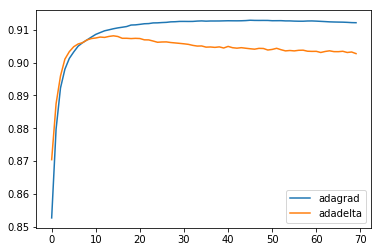

In [23]:
#### Exploring LightFM
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import auc_score

movielens = fetch_movielens()

train, test = movielens['train'], movielens['test']

alpha = 1e-3
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adagrad',
                        user_alpha=alpha,
                        item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adadelta',
                        user_alpha=alpha,
                        item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())
    
    
adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())
    
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

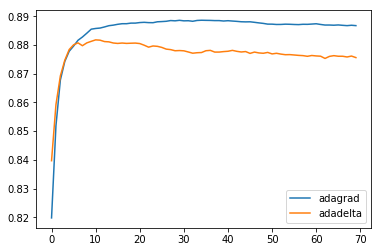

In [24]:
alpha = 1e-3
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp-kos',
                        learning_schedule='adagrad',
                        user_alpha=alpha, item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp-kos',
                        learning_schedule='adadelta',
                        user_alpha=alpha, item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())
    
    
adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())
    
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()